<a href="https://colab.research.google.com/github/elliotgunn/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
import math

def mean(list):
  sum = 0
  for x in list:
    sum = sum + x
  
  return sum / len(list)


def var(list):
  mn = mean(list)
  # sum = 0 
  variance = sum((mn-x)**2 for x in list)/(len(list)-1 )
  # for x in list:
    # sum += (x - mn)*(x - mn)
  return variance # (sum / len(list))

def stdev(list):
  return math.sqrt(var(list))


In [0]:
print(mean(sales))
print(var(sales))
print(stdev(sales))

3052.714285714286
214387.90476190473
463.0204150595357


In [0]:
# verify

# pvariance(): population; pstdev(): population stdev
# stdev() and variance() are sample statistics

import statistics

print(statistics.mean(sales))
print(statistics.pvariance(sales))
print(statistics.pstdev(sales))

print(statistics.variance(sales))
print(statistics.stdev(sales))

3052.714285714286
183761.0612244898
428.67360686714756
214387.90476190476
463.02041505953576


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [0]:
import numpy as np

In [0]:
# by default numpy calculates sample covariance
# and returns a matrix. so locate for cov

cov = np.cov(sales, customers)[0, 1]
print(cov)

7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
stdev(customers)

17.057326313123664

In [0]:
stdev(sales)

463.0204150595357

In [0]:
corr_coef = cov / (statistics.stdev(customers)*statistics.stdev(sales))

corr_coef

0.9628339778148908

In [0]:
# returns a matrix 

np.corrcoef(sales, customers)[0, 1]

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

import pandas as pd

df = pd.read_csv(url)

df.head(2)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# variance covariance matrix

df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
# correlation matrix

df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

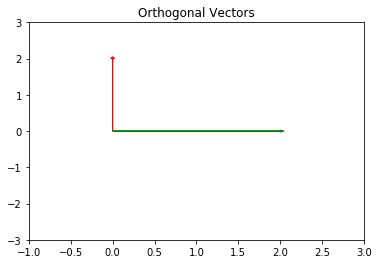

In [0]:
import matplotlib.pyplot as plt

# perpendicular, or when the dot product is 0

vector_1 = [0, 2]
vector_2 = [2, 0]

# plot the vectors

plt.arrow(0,0, vector_1[0], vector_1[1], head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1], head_width=.05, head_length=0.05, color ='green')

plt.xlim(-1,3)          
plt.ylim(-3,3)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# perform dot product test

a = [-5, 3, 7]

b = [6, -8, 2]

np.vdot(a,b)

-40

In [0]:
# no, not orthogonal as dot product is not equal to zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# double pipes refer to norm or magnitude of a vector

c = [2, -15, 6, 20]

print((np.linalg.norm(c))**2)

665.0


In [0]:
# dot product

print(np.vdot(c,c))

665


In [0]:
# transpose and multiply via cross product

# np.cross(np.transpose(c), c)

# error: not possible

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
c = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
c = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0\\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} -8 \begin{bmatrix} 0 \\ 0 \\1  \end{bmatrix} = 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# A given vector can be converted to a unit vector by dividing it by it's magnitude

f = [4,12,11,9,2]

f / np.linalg.norm(f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Two vectors that live on the same line are what's called linearly dependent. 

# Linearly independent vectors are vectors that don't lie on the same line as each other. 

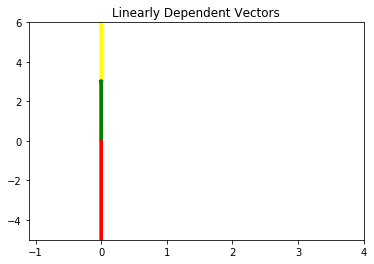

In [0]:
# linear dependent vectors

v = [0,3]
# scaled vector
v2 = np.multiply(v, 3)
v3 = np.multiply(v,-5)
# get vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# plt vectors and L
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-5,6)


plt.title('Linearly Dependent Vectors')

plt.show()



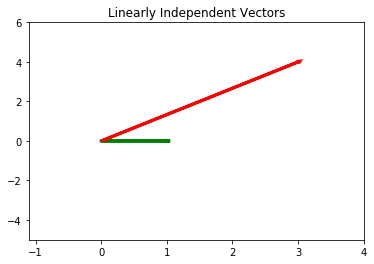

In [0]:
# linear independent vectors

y = [1, 0]
w = [3, 4]

# get vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# plt vectors and L
plt.arrow(0, 0, y[0], y[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-5,6)


plt.title('Linearly Independent Vectors')

plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# The span is the set of all possible vectors that can be created with a linear combination of two vectors 

# the span of vectors is the size of the space they define

# A linear combination of two vectors just means that we're composing to vectors (via addition or subtraction) to create a new vector. 

# what are all the possible vectors you can reach using these two vectors? if linearly independent (not on the same line), then every vector in the R2 space 

g = [1, 2]
h = [4, 8]

# span of 1 dimensional space/just a line as they're on the same line i.e. linearly dependent 

In [0]:
# another way of saying a redunancy is linearly dependent 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# span of 3 dimensional space as 3 vectors

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



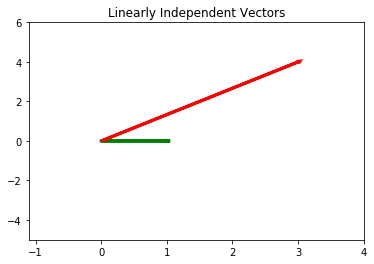

In [0]:
# linear independent vectors

y = [1, 0]
w = [3, 4]

# get vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# plt vectors and L
plt.arrow(0, 0, y[0], y[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-5,6)


plt.title('Basis vectors for R2')

plt.show()

In [0]:
# they form a basis in R2, because they span R2

# additionally, if the vectors were orthogonal (perpendicular, dot product 0), then 
# we would call this an orthogonal basis 

# and if they are orthogonal, each have unit length, linear independence, span the vector space etc
# then they are an orthonormal basis


## 6.2 What does it mean to form a basis?

The basis of a vector space $V$ is a set of vectors that are linearly independent and that span the vector space $V$.

Basis: the basis of a vector space is a set of linearly independent vectors that span the full space


# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

\begin{align}
P = \begin{bmatrix} 
1 & 0 & -7 \\
 0 & 1 & 5 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

In [0]:
# rank of a matrix is the dimension of the vector space spanned by its columns
# watch out for linear dependence within the matrix! 

# we have to use Gaussian elimination 

# did it by hand

# rank = 3


In [0]:
# validate

p = np.array([[1,2,3],
             [-1,0,7],
             [4,8,2]])

np.linalg.matrix_rank(p)


3

## 7.2 What does the rank of a matrix tell us?

It tells us that the dimension of the vector space spanned by its columns. 

There is no linear dependence between the three rows

In this case, it's 3D. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

Since $cv = proj_{L}(w)$ we know that: 

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

In [0]:
v = [1, 3]
w = [-1, 2]

# use dot product

print(np.vdot(w,v)/np.vdot(v,v))
# this gives a scalar

proj = np.multiply((np.vdot(w,v)/np.vdot(v,v)), v)
proj

0.5


array([0.5, 1.5])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


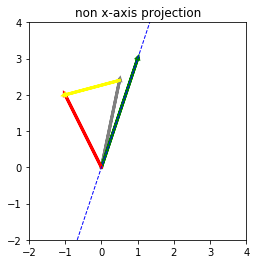

In [82]:
import matplotlib.pyplot as plt

# validate via graphs

# axis bounds: make sure this is square/even!
plt.xlim(-2, 4)
plt.ylim(-2, 4)

# original vectors
v = [1, 3] # green
w = [-1, 2] # red

# shadow: this is the c-value that scales the green vector to give us the grey aka projL(w)
# proj = np.multiply(0.8, v)
proj = np.array((0.5, 2.4))

# right angle proof
x_minus_proj = w-proj # red minus shadow

# set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# get vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("non x-axis projection")
plt.show()


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

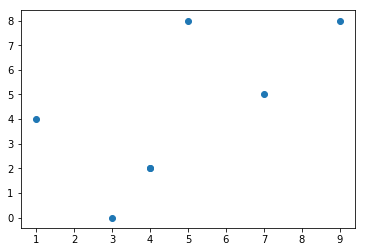

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()